### Connect to drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Download Kaggle Dataset

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! pip install kaggle

In [ ]:
! kaggle datasets download misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
100% 532M/534M [00:06<00:00, 99.3MB/s]
100% 534M/534M [00:06<00:00, 81.3MB/s]


In [ ]:
!unzip vegetable-image-dataset.zip

In [ ]:
!pip3 install torch torchvision torchaudio

### Load libraries

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:

from torchvision.transforms import Compose, Normalize, Resize, ToPILImage, ToTensor

### Loading data

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

In [ ]:
import json

In [ ]:
# Get the imageNet Class label names
!curl -k https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/imageNetclasses.json -o "imageNetclasses.json"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33567  100 33567    0     0   171k      0 --:--:-- --:--:-- --:--:--  171k


In [ ]:
with open('imageNetclasses.json') as f:
    class_names = json.load(f)

In [ ]:
data_dir = "/content/Vegetable Images"
train_data_dir = data_dir + "/" + "train"
validation_data_dir = data_dir + "/" + "validation"
test_data_dir = data_dir + "/" + "test"

In [ ]:
labels_txt = sorted(os.listdir(train_data_dir))
labels_txt

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [ ]:
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

All datasets are subclasses of torch.utils.data.Dataset i.e, they have `__getitem__` and `__len__` methods implemented. Hence, they can all be passed to a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which can load multiple samples in parallel using torch.multiprocessing workers.

[`ImageFolder`](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder)
This class inherits from `DatasetFolder` so the same methods can be overridden to customize the dataset.

In [ ]:
train_data = ImageFolder(
    root=train_data_dir,
    transform=transform,
)

validation_data = ImageFolder(
    root=validation_data_dir,
    transform=transform,
)

The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval.

[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) is an iterable that abstracts this complexity for us in an easy API.

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
validation_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True, num_workers=2)

In [ ]:
im, cls = next(iter(train_dataloader))

In [ ]:
im.shape, cls.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
cls

tensor([ 8,  7,  7,  2,  9,  7, 10, 14,  5, 14, 14,  5,  7,  3, 13,  1, 11,  0,
         6,  1,  1, 12,  0,  2, 14,  2,  9,  7,  8, 10,  1,  1])

In [ ]:
datasets = {
    "train": train_data,
    "val": validation_data,
}

dataloaders = {
    "train": train_dataloader,
    "val": validation_dataloader,
}

dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

{'train': 15000, 'val': 3000}


### Visualize data

In [ ]:
plt.figure(figsize=(16, 16))

nrows = 4
ncols = 4

_, ax = plt.subplots(
    nrows,
    ncols,
    squeeze=True,
)

images = im[:16]
classes = cls[:16]
fontdict = {
    'fontsize': 8,
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}

for i in range(nrows):
    for j in range(ncols):
        img = ToPILImage()(im[i+j])
        if i == 1 and j == 1:
          print(np.array(img, dtype=np.uint8))

        ax[i][j].imshow(np.array(img, dtype=np.uint8))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(labels_txt[cls[i+j]], loc='center', **fontdict)

plt.show()

In [ ]:
from torchvision.transforms import Lambda

In [ ]:
plt.figure(figsize=(16, 16))

nrows = 4
ncols = 4

_, ax = plt.subplots(
    nrows,
    ncols,
    squeeze=True,
)

images = im[:16]
classes = cls[:16]
fontdict = {
    'fontsize': 8,
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}

inverse_norm = Compose([
    Lambda(lambda img: img * 0.224),
    Lambda(lambda img: img + 0.406),
])

# [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

for i in range(nrows):
    for j in range(ncols):
        tensor = im[i+j]
        inv_norm_tensor = inverse_norm(tensor)
        img = ToPILImage()(inv_norm_tensor)

        if i == 1 and j == 1:
          print(np.array(img, dtype=np.uint8))

        ax[i][j].imshow(np.array(img, dtype=np.uint8))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(labels_txt[cls[i+j]], loc='center', **fontdict)

plt.show()

## Using pre-trained network.

In [ ]:
from torchvision.models import resnet50
from torchsummary import summary

In [ ]:
model = resnet50(pretrained=True)

C:\Python11\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python11\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
from torch.autograd import Variable

In [ ]:
def predict_image(images, class_names):
    to_pil = ToPILImage()
    fig = plt.figure(figsize=(16,16))

    for (i,image) in enumerate(images):
        image = to_pil(image)
        image_tensor = transform(image).float().unsqueeze_(0)
        input = Variable(image_tensor).to("cpu")
        output = model(input)
        index = output.data.cpu().numpy().argmax()
        name = class_names[str(index)]

        sub = fig.add_subplot(len(images),1, i+1)
        sub.set_title(f'Predicted {str(name)}', **fontdict)
        plt.axis('off')
        plt.imshow(image)
    plt.show()

In [ ]:
val_images, _ = next(iter(validation_dataloader))
predict_image(val_images[:16], class_names)

## Fine-tuning the model

In [ ]:
import copy
import time

In [ ]:
from torch import set_grad_enabled, max, sum
from torch.nn import CrossEntropyLoss, Linear
from torch.optim import lr_scheduler, SGD

<img src="./torch-backward.JPG" style="width:600px">
<img src="./torch-optim-step.JPG" style="width:600px">
<img src="./torch-set_grad_enabled.JPG" style="width:600px">


### Fine tuning

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to("cuda")
                labels = labels.to("cuda")

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = resnet50(pretrained=True)
num_features = model_ft.fc.in_features

# Here the size of each output sample is set to 15.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = Linear(num_features, 15)
model_ft = model_ft.to("cuda")

criterion = CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

NameError: ignored

In [ ]:
model_ft = train_model(
    model_ft,
    criterion,
    optimizer_ft,
    exp_lr_scheduler,
    num_epochs=5,
)

### Visualize predictions

In [ ]:
from torchvision.utils import make_grid
from torch import no_grad

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


def visualize_predictions(model, num_images=6, device="cpu"):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                print(preds[j])
                ax.set_title(f'predicted: {labels_txt[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return

        model.train(mode=was_training)

In [ ]:
visualize_predictions(model_ft)

### Saving model

In [ ]:
from torch import save, load

In [ ]:
PATH = "vegetables.ckpt"

In [ ]:
save({
  'epoch': 4,
  'model_state_dict': model_ft.state_dict(),
  'optimizer_state_dict': optimizer_ft.state_dict(),
}, PATH)

## Loading pre-trained model

In [ ]:
from torch import save, load
from torchvision.models import resnet50

In [ ]:
PATH = "/content/gdrive/MyDrive/Colab Notebooks/Pretrained-Models/vegetables.pt"
saved_model = load(PATH)
saved_model["model_state_dict"].keys()

In [ ]:
from torch.nn import Module

In [ ]:
from torchvision.models import ResNet50_Weights

In [ ]:
ResNet50_Weights

<enum 'ResNet50_Weights'>

In [ ]:
model_pretr = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]


In [ ]:
model_pretr.load_state_dict(saved_model["model_state_dict"])
model_pretr.eval()

RuntimeError: ignored

In [ ]:
model_pretr.fc = Linear(2048, 15)

In [ ]:
model_pretr.load_state_dict(saved_model["model_state_dict"])
model_pretr.eval()

In [ ]:
model_pretr.to("cuda")

tensor(6)


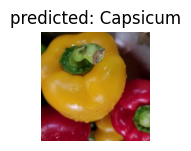

tensor(12)


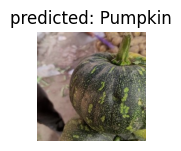

tensor(11)


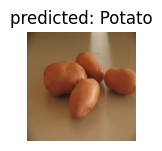

tensor(4)


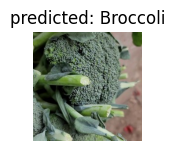

tensor(7)


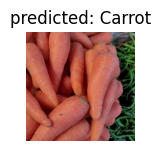

tensor(3)


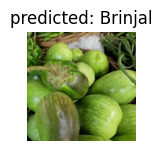

In [ ]:
visualize_predictions(model_pretr)

## Using ONNX

### Export to onnx format

In [ ]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 43.5 MB/s eta 0:00:00


In [ ]:
from torch import onnx, randn

In [ ]:
model_pretr.to("cpu")
model_pretr.eval()

In [ ]:
# Let's create a dummy input tensor
dummy_input = randn(32, 3, 224, 224, requires_grad=True).to("cpu")

onnx.export(
    model_pretr,               # model being run
    dummy_input,               # model input (or a tuple for multiple inputs)
    "vegetables.onnx",         # where to save the model (can be a file or file-like object)
    export_params=True,        # store the trained parameter weights inside the model file
    opset_version=10,          # the ONNX version to export the model to
    do_constant_folding=True,  # whether to execute constant folding for optimization
    input_names=['input'],     # the model's input names
    output_names=['output'],   # the model's output names
    dynamic_axes={
        "input": {0 : "batch_size"},    # variable length axes
        "output": {0 : "batch_size"},
    }
)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
import onnx

onnx_model = onnx.load("vegetables.onnx")
onnx.checker.check_model(onnx_model)

### ONNX Inference

In [ ]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import onnxruntime
import numpy as np

In [ ]:
ort_session = onnxruntime.InferenceSession("/content/gdrive/MyDrive/Colab Notebooks/Pretrained-Models/vegetables.onnx")

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

img = Image.open("/content/Vegetable Images/validation/Broccoli/1201.jpg")
img = np.array(img).astype(np.float32).transpose(2, 0, 1)[np.newaxis, ...]


# resize = transforms.Resize([224, 224])
# img = resize(img)

# to_tensor = transforms.ToTensor()
# img_ycbcr = to_tensor(img)

#  Increase the dimension; torch.Size([1, 3, 224, 224]) -> torch.Size([1, 3, 224, 224])
# img_ycbcr.unsqueeze_(0)
# img_ycbcr.shape

img.shape

(1, 3, 224, 224)

In [ ]:
np.mean(img.reshape((3, 224*224)), axis=1)

array([109.691345, 118.50665 ,  91.18571 ], dtype=float32)

In [ ]:
img_transform = Compose([
    Resize([224, 224]),
    ToTensor(),
])

test_data = ImageFolder(
    root=test_data_dir,
    transform=img_transform,
)
test_data_itr = iter(test_data)

In [ ]:
def to_numpy(tensor):
    """
    REQUIRES_GRAD: Is True if gradients need to be computed for this Tensor, False otherwise.
    """
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

def predict_and_plot(test_image):
  ort_inputs = {ort_session.get_inputs()[0].name: test_image}
  ort_outs = ort_session.run(None, ort_inputs)
  img_out_y = ort_outs[0]
  print(img_out_y)
  pred_label = labels_txt[img_out_y[0].argmax(0)]

  if not isinstance(test_image, np.ndarray):
    to_img = ToPILImage()
    img = to_img(test_image[0])
  else:
    img = np.squeeze(test_image).transpose(1, 2, 0).astype(np.uint8)

  plt.figure(figsize=(6, 6))
  plt.title(pred_label)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

[[ -95.25635   -105.20528     22.42019     74.68433     30.040585
  -124.30745    106.44797    -35.000286   -88.5314     -29.400248
  -129.54707     57.48699     -0.6112399  -31.691902   186.43556  ]]


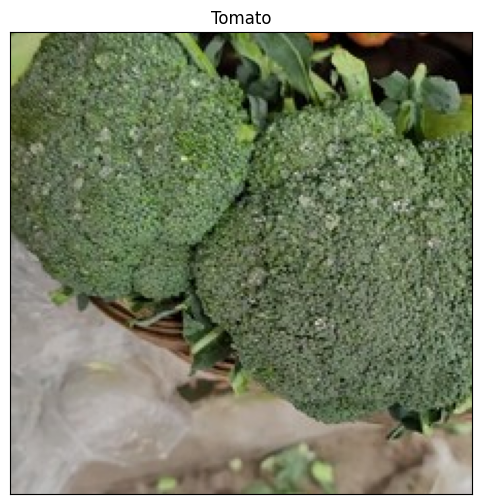

In [ ]:
predict_and_plot(img)

[[ 7.9997377  -2.459918   -2.1421978  -1.9871273  -0.46969706  2.1287534
  -0.10178116 -0.732077   -0.897947   -1.6333022  -1.5993906  -0.29615134
  -0.73003185  1.8350159   1.684692  ]]


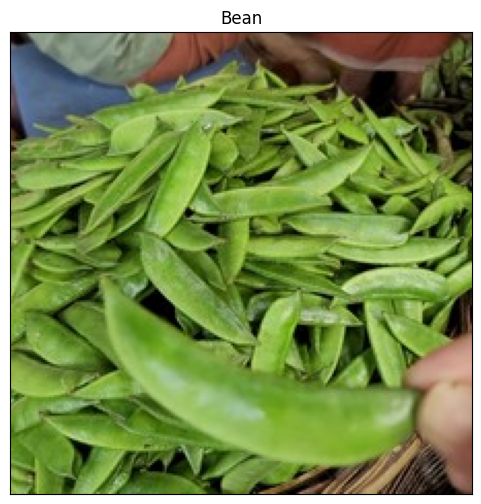

In [ ]:
im, _ = next(test_data_itr)
im.unsqueeze_(0)
predict_and_plot(im)

In [ ]:
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_ycbcr)}
ort_outs = ort_session.run(None, ort_inputs)
img_out_y = ort_outs[0]

In [ ]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

class VegetablesDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        pass

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        pass

## Misc

In [ ]:
del model_pretr

In [ ]:
from torch.cuda import empty_cache

In [ ]:
empty_cache()